## Morgan Lind

## Project Check-In

04-21-2025

### Project Questions: 
- What are the top three communities in the Los Angeles with the most crimes are committed? What is the dominating ethnic group residing in those communities? 
- How have crime rates in neighborhoods changed between January-March 2024 and 2025, considering both statistical significance and trends based on linear regression analysis?
- Are there specific communities where crimes involving child victims are more prevalent? Are certain ethnic groups more likely to experience crimes in their neighborhood where the victims are underage?  
-  Is there a predominant race in communities where women are more frequently targeted than men, or is the distribution of crime victims relatively even across genders and races? 

### Preparation
- Begin to answer 1-2 of your analysis questions
    - Univariate (pie chart of the top 3 communities where crimes are committed)
    - Bivariate
    - 1 Hypothesis Test (Welch's t-test for crimes in the first 3 months of 2024 and 2025)
    - 2 Visualizations (pie chart, FacetGrid, Box Plot)
- Machine learning - implement 1 technique for check-in (linear regression)

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Libraries for Descriptive Stats

In [2]:
# little more in detail and advanced compared to matplotlib
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
from scipy.stats import bartlett
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import bartlett
from scipy.stats import shapiro
from scipy.stats import kruskal
from datetime import datetime

### Libraries for Machine Learning 

In [3]:
import sklearn

In [4]:
from sklearn.linear_model import LinearRegression
from scipy import stats
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import log_loss
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.metrics import confusion_matrix, classification_report, f1_score, r2_score

In [61]:
# import the merged dataframe from the 2 sources

crime_rates = pd.read_csv('crime_population_merged.csv', encoding = 'utf-8', sep=',', low_memory=False)

crime_rates.head(10)

,DR_NO,DATE_RPTD,DATE_OCC,AREA,AREA_NAME,RPT_DIST_NO,CRM_CD,CRM_CD_DESC,MOCODES,VICT_AGE,...,STATUS_DESC,LOCATION,American Indian and Alaska Native,Asian,African American,Native Hawaiian and Other Pacific Islander,White,Some Other Race,Two or More Races,Hispanic or Latino
0,250504239,2025-03-13,2025-03-13,5,Harbor,516,510,VEHICLE - STOLEN,Unknown,X,...,Invest Cont,1300 N FRIES AV,"24,640",80,"4,821","2,386",138,"4,126","4,491","5,093"
1,250504239,2025-03-13,2025-03-13,5,Harbor,516,510,VEHICLE - STOLEN,Unknown,X,...,Invest Cont,1300 N FRIES AV,"39,225",245,"7,595","6,170",9,"2,869","11,679","7,307"
2,250504239,2025-03-13,2025-03-13,5,Harbor,516,510,VEHICLE - STOLEN,Unknown,X,...,Invest Cont,1300 N FRIES AV,"83,697",808,"5,677","4,216",351,"26,747","14,293","15,843"
3,250504239,2025-03-13,2025-03-13,5,Harbor,516,510,VEHICLE - STOLEN,Unknown,X,...,Invest Cont,1300 N FRIES AV,970,16,49,137,10,407,10,0
4,250504239,2025-03-13,2025-03-13,5,Harbor,516,510,VEHICLE - STOLEN,Unknown,X,...,Invest Cont,1300 N FRIES AV,"52,030",540,"1,635","1,697",161,"1,839","12,306","7,379"
5,250504238,2025-03-13,2025-03-13,5,Harbor,569,440,THEFT PLAIN - PETTY ($950 & UNDER),Unknown,X,...,Invest Cont,BERTH 73,"24,640",80,"4,821","2,386",138,"4,126","4,491","5,093"
6,250504238,2025-03-13,2025-03-13,5,Harbor,569,440,THEFT PLAIN - PETTY ($950 & UNDER),Unknown,X,...,Invest Cont,BERTH 73,"39,225",245,"7,595","6,170",9,"2,869","11,679","7,307"
7,250504238,2025-03-13,2025-03-13,5,Harbor,569,440,THEFT PLAIN - PETTY ($950 & UNDER),Unknown,X,...,Invest Cont,BERTH 73,"83,697",808,"5,677","4,216",351,"26,747","14,293","15,843"
8,250504238,2025-03-13,2025-03-13,5,Harbor,569,440,THEFT PLAIN - PETTY ($950 & UNDER),Unknown,X,...,Invest Cont,BERTH 73,970,16,49,137,10,407,10,0
9,250504238,2025-03-13,2025-03-13,5,Harbor,569,440,THEFT PLAIN - PETTY ($950 & UNDER),Unknown,X,...,Invest Cont,BERTH 73,"52,030",540,"1,635","1,697",161,"1,839","12,306","7,379"


In [62]:
# drop all instances where Victim Age, Sex, and Descent are unknown ('X')
# There is not enough information to provide an accurate analysis 

columns_to_check = ['VICT_AGE', 'VICT_SEX', 'VICT_DESCENT']

# Filter out rows where any of those columns contain 'X'
crime_rates = crime_rates[~crime_rates[columns_to_check].isin(['X']).any(axis=1)]

In [63]:
# Drop all duplicate DR_NO record numbers and only keep the first occurrence
crime_rates = crime_rates[~crime_rates['DR_NO'].duplicated()]

In [64]:
# drop columns that are not needed in this analysis
crime_rates = crime_rates.drop(['DATE_RPTD', 'CRM_CD','AREA','RPT_DIST_NO', 'MOCODES','CRM_CD', 'PREMIS_CD', 'WEAPON_USED_CD','STATUS', 'Some Other Race', 'Two or More Races' ], axis=1)

In [65]:
# check the size of dataframe
crime_rates.shape

(69353, 17)

In [66]:
# check the data types
crime_rates.dtypes

DR_NO                                          int64
DATE_OCC                                      object
AREA_NAME                                     object
CRM_CD_DESC                                   object
VICT_AGE                                      object
VICT_SEX                                      object
VICT_DESCENT                                  object
PREMIS_DESC                                   object
WEAPON_DESC                                   object
STATUS_DESC                                   object
LOCATION                                      object
American Indian and Alaska Native             object
Asian                                         object
African American                              object
Native Hawaiian and Other Pacific Islander    object
White                                         object
Hispanic or Latino                            object
dtype: object

In [97]:
# remove the comma in the demographic population and convert to an integer
crime_rates[['American Indian and Alaska Native', 'Asian', 'African American', 
             'Native Hawaiian and Other Pacific Islander','White',  
             'Hispanic or Latino']] = crime_rates[['American Indian and Alaska Native', 'Asian', 'African American',
                                                   'Native Hawaiian and Other Pacific Islander',
                                                   'White', 'Hispanic or Latino']].replace({',': ''}, regex=True).astype(int)


# create a new column that across the ethnic group rows 
crime_rates.loc[:, 'Total Population'] = crime_rates.loc[:, [
    'American Indian and Alaska Native', 
    'Asian', 
    'African American', 
    'Native Hawaiian and Other Pacific Islander',
    'White',  
    'Hispanic or Latino'
]].sum(axis=1)

KeyError: "None of [Index(['American Indian and Alaska Native', 'Asian', 'African American',\n       'Native Hawaiian and Other Pacific Islander', 'White',\n       'Hispanic or Latino'],\n      dtype='object')] are in the [columns]"

In [68]:
# create an ethnicity_groups list with all demographic columns used to group the data
ethnicity_groups = ['American Indian and Alaska Native','Asian', 'African American',
                    'Native Hawaiian and Other Pacific Islander', 'White', 'Hispanic or Latino']

In [69]:
# Convert raw population data to proportions using a for loop
for group in ethnicity_groups:
    crime_rates[group + ' (Proportion)'] = crime_rates[group] / crime_rates['Total Population']

In [70]:
# check updated dataframe
crime_rates.head()

,DR_NO,DATE_OCC,AREA_NAME,CRM_CD_DESC,VICT_AGE,VICT_SEX,VICT_DESCENT,PREMIS_DESC,WEAPON_DESC,STATUS_DESC,...,Native Hawaiian and Other Pacific Islander,White,Hispanic or Latino,Total Population,American Indian and Alaska Native (Proportion),Asian (Proportion),African American (Proportion),Native Hawaiian and Other Pacific Islander (Proportion),White (Proportion),Hispanic or Latino (Proportion)
20,250504185,2025-02-21,Harbor,BATTERY - SIMPLE ASSAULT,15,F,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,...,2386,138,5093,37158,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063
35,250504181,2025-02-20,Harbor,BURGLARY,51,M,W,STORAGE SHED,Unknown / None Used,Invest Cont,...,2386,138,5093,37158,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063
65,250504132,2025-02-06,Harbor,CRIMINAL THREATS - NO WEAPON DISPLAYED,54,M,W,JUNIOR HIGH SCHOOL,VERBAL THREAT,Invest Cont,...,2386,138,5093,37158,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063
135,250504106,2025-01-31,Harbor,BATTERY WITH SEXUAL CONTACT,15,F,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,...,2386,138,5093,37158,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063
150,250504122,2025-01-31,Harbor,BATTERY - SIMPLE ASSAULT,13,F,H,PARK/PLAYGROUND,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,...,2386,138,5093,37158,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063


In [71]:
# drop the raw number population ethnicity_group columns 
crime_rates = crime_rates.drop(['American Indian and Alaska Native', 'Asian', 'African American',
                                'Native Hawaiian and Other Pacific Islander', 'White', 'Hispanic or Latino', 'Total Population'], axis=1)

In [72]:
# check that are rows were dropped
crime_rates.head(10)

,DR_NO,DATE_OCC,AREA_NAME,CRM_CD_DESC,VICT_AGE,VICT_SEX,VICT_DESCENT,PREMIS_DESC,WEAPON_DESC,STATUS_DESC,LOCATION,American Indian and Alaska Native (Proportion),Asian (Proportion),African American (Proportion),Native Hawaiian and Other Pacific Islander (Proportion),White (Proportion),Hispanic or Latino (Proportion)
20,250504185,2025-02-21,Harbor,BATTERY - SIMPLE ASSAULT,15,F,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,1500 LAKME AV,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063
35,250504181,2025-02-20,Harbor,BURGLARY,51,M,W,STORAGE SHED,Unknown / None Used,Invest Cont,2200 MINER ST,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063
65,250504132,2025-02-06,Harbor,CRIMINAL THREATS - NO WEAPON DISPLAYED,54,M,W,JUNIOR HIGH SCHOOL,VERBAL THREAT,Invest Cont,1500 S CABRILLO AV,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063
135,250504106,2025-01-31,Harbor,BATTERY WITH SEXUAL CONTACT,15,F,H,STREET,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,17TH,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063
150,250504122,2025-01-31,Harbor,BATTERY - SIMPLE ASSAULT,13,F,H,PARK/PLAYGROUND,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,3700 STEPHEN M WHITE DR,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063
240,250504051,2025-01-14,Harbor,ROBBERY,15,F,H,HIGH SCHOOL,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,24300 WESTERN AV,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063
250,250504055,2025-01-13,Harbor,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",13,M,H,JUNIOR HIGH SCHOOL,OTHER CUTTING INSTRUMENT,Invest Cont,1500 S CABRILLO AV,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063
270,250504024,2025-01-06,Harbor,BURGLARY,46,M,B,OTHER BUSINESS,Unknown / None Used,Invest Cont,2400 S SIGNAL ST,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063
285,240513489,2024-12-29,Harbor,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),66,M,W,GARAGE/CARPORT,Unknown / None Used,Invest Cont,3100 S PECK AV,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063
290,240513484,2024-12-29,Harbor,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",46,M,J,"VEHICLE, PASSENGER/TRUCK",Unknown / None Used,Invest Cont,1200 W CAPITOL DR,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063


In [73]:
# Make sure appropriate columns were dropped
crime_rates.columns

Index(['DR_NO', 'DATE_OCC', 'AREA_NAME', 'CRM_CD_DESC', 'VICT_AGE', 'VICT_SEX',
       'VICT_DESCENT', 'PREMIS_DESC', 'WEAPON_DESC', 'STATUS_DESC', 'LOCATION',
       'American Indian and Alaska Native (Proportion)', 'Asian (Proportion)',
       'African American (Proportion)',
       'Native Hawaiian and Other Pacific Islander (Proportion)',
       'White (Proportion)', 'Hispanic or Latino (Proportion)'],
      dtype='object')

##### Find the total population of each community

In [74]:
# create a dataframe that will display only the area name and the population proportion of each demographic
population_df = crime_rates[['AREA_NAME', 'American Indian and Alaska Native (Proportion)', 'Asian (Proportion)', 
                             'African American (Proportion)', 'Native Hawaiian and Other Pacific Islander (Proportion)',
                             'White (Proportion)', 'Hispanic or Latino (Proportion)']]

population_df.head()

,AREA_NAME,American Indian and Alaska Native (Proportion),Asian (Proportion),African American (Proportion),Native Hawaiian and Other Pacific Islander (Proportion),White (Proportion),Hispanic or Latino (Proportion)
20,Harbor,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063
35,Harbor,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063
65,Harbor,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063
135,Harbor,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063
150,Harbor,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063


In [75]:
# add a total populatin proportion column to check that the sum of each row is equal to 1
population_df.loc[:, 'Population Proportion'] = population_df[[
    'American Indian and Alaska Native (Proportion)', 
    'Asian (Proportion)', 
    'African American (Proportion)', 
    'Native Hawaiian and Other Pacific Islander (Proportion)', 
    'White (Proportion)', 
    'Hispanic or Latino (Proportion)'
]].sum(axis=1)
# Display the updated DataFrame
population_df.head()

/var/folders/7v/xrwq6wg17s97dttr3lbqz7jw0000gn/T/ipykernel_10676/409225674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_df.loc[:, 'Population Proportion'] = population_df[[


,AREA_NAME,American Indian and Alaska Native (Proportion),Asian (Proportion),African American (Proportion),Native Hawaiian and Other Pacific Islander (Proportion),White (Proportion),Hispanic or Latino (Proportion),Population Proportion
20,Harbor,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063,1.0
35,Harbor,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063,1.0
65,Harbor,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063,1.0
135,Harbor,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063,1.0
150,Harbor,0.663114,0.002153,0.129743,0.064212,0.003714,0.137063,1.0


### Question 1: 
- For the top three communities in which the most crimes are committed what is the dominating ethnic group residing in those particular areas? 

In [76]:
# use .describe() for the categorical variable AREA_NAME grouped by each individual area
descriptive_stats = crime_rates.groupby("AREA_NAME")["DR_NO"].describe()

print(descriptive_stats)

              count          mean           std          min           25%  \
AREA_NAME                                                                    
Central      5375.0  2.401443e+08  5.611089e+05  240100501.0  2.401075e+08   
Devonshire   3354.0  2.417681e+08  7.696676e+05  241700507.0  2.417061e+08   
Foothill     2388.0  2.416283e+08  4.570197e+05  241600500.0  2.416057e+08   
Harbor       2813.0  2.405574e+08  7.006906e+05  240500005.0  2.405058e+08   
Hollenbeck   1970.0  2.404434e+08  5.953907e+05  240400502.0  2.404053e+08   
Hollywood    4064.0  2.406702e+08  7.816800e+05  240106465.0  2.406064e+08   
Mission      3093.0  2.419663e+08  7.604627e+05  241900501.0  2.419060e+08   
N Hollywood  4232.0  2.415354e+08  5.091323e+05  240912846.0  2.415067e+08   
Newton       2710.0  2.413450e+08  6.571609e+05  231305396.0  2.413057e+08   
Northeast    2851.0  2.411642e+08  7.468646e+05  241100503.0  2.411058e+08   
Olympic      3537.0  2.420327e+08  4.937045e+05  240612023.0  2.

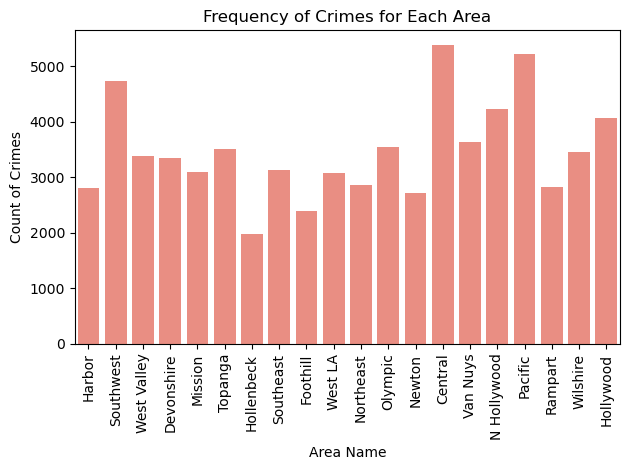

In [77]:
# create a histogram to visualize the number of crimes per area
sns.countplot(data=crime_rates, x='AREA_NAME', color='salmon')
plt.xticks(rotation=90)
plt.title('Frequency of Crimes for Each Area')
plt.xlabel('Area Name')
plt.ylabel('Count of Crimes')
plt.tight_layout()
plt.show()


In [79]:
# Group by the communities and total the number of crimes committed in each community and display the top 3 
top_communities = crime_rates.groupby('AREA_NAME')['DR_NO'].count().sort_values(ascending=False).head(3)

top_communities

AREA_NAME
Central      5375
Pacific      5215
Southwest    4739
Name: DR_NO, dtype: int64

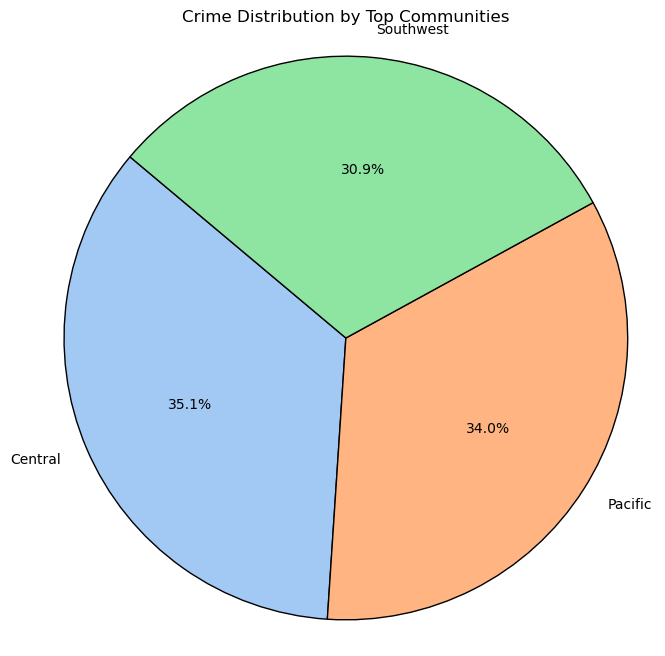

In [80]:
# create a pie chart
plt.figure(figsize=(8, 8))

# use top_communities values and its index as the chart's labels
plt.pie(
    top_communities,
    labels=top_communities.index,
    autopct='%1.1f%%', # round to one decimal
    startangle=140,
    colors=sns.color_palette("pastel"),  # pastel color palette
    wedgeprops={"edgecolor": "black"}   # black edges
)
plt.title('Crime Distribution by Top Communities')
plt.axis('equal')  # Pie chart is circular
plt.show()

#### Steps to create an effective FacetGrid

In [81]:
# return the top 3 communities names as a list
top_communities = crime_rates.groupby('AREA_NAME')['DR_NO'].count().sort_values(ascending=False).head(3).index.tolist()

In [82]:
# filter crime_rates to include top_communities in AREA_NAME with the ethnicity_groups 
filtered_population = population_df[population_df['AREA_NAME'].isin(top_communities)]
filtered_population

,AREA_NAME,American Indian and Alaska Native (Proportion),Asian (Proportion),African American (Proportion),Native Hawaiian and Other Pacific Islander (Proportion),White (Proportion),Hispanic or Latino (Proportion),Population Proportion
28586,Southwest,0.745936,0.014170,0.043278,0.086006,0.00692,0.103691,1.0
28609,Southwest,0.745936,0.014170,0.043278,0.086006,0.00692,0.103691,1.0
28655,Southwest,0.745936,0.014170,0.043278,0.086006,0.00692,0.103691,1.0
28678,Southwest,0.745936,0.014170,0.043278,0.086006,0.00692,0.103691,1.0
28770,Southwest,0.745936,0.014170,0.043278,0.086006,0.00692,0.103691,1.0
...,...,...,...,...,...,...,...,...
901276,Pacific,0.803915,0.000328,0.106299,0.026465,0.00000,0.062992,1.0
901292,Pacific,0.803915,0.000328,0.106299,0.026465,0.00000,0.062992,1.0
901308,Pacific,0.803915,0.000328,0.106299,0.026465,0.00000,0.062992,1.0
901324,Pacific,0.803915,0.000328,0.106299,0.026465,0.00000,0.062992,1.0


In [83]:
# group filtered_population by AREA_NAME and sum values for each ethnic group, and reset the index to a
melted_population = filtered_population.melt(
    id_vars='AREA_NAME',
    value_vars=[
        'American Indian and Alaska Native (Proportion)', 
        'Asian (Proportion)', 
        'African American (Proportion)', 
        'Native Hawaiian and Other Pacific Islander (Proportion)', 
        'White (Proportion)', 
        'Hispanic or Latino (Proportion)'
    ],
    var_name='Ethnic Group',
    value_name='Proportion of Population'
)

In [84]:
# remove the string " (Proportion)" 
melted_population['Ethnic Group'] = melted_population['Ethnic Group'].str.replace(' \(Proportion\)', '', regex=True)

/Users/morganlind/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


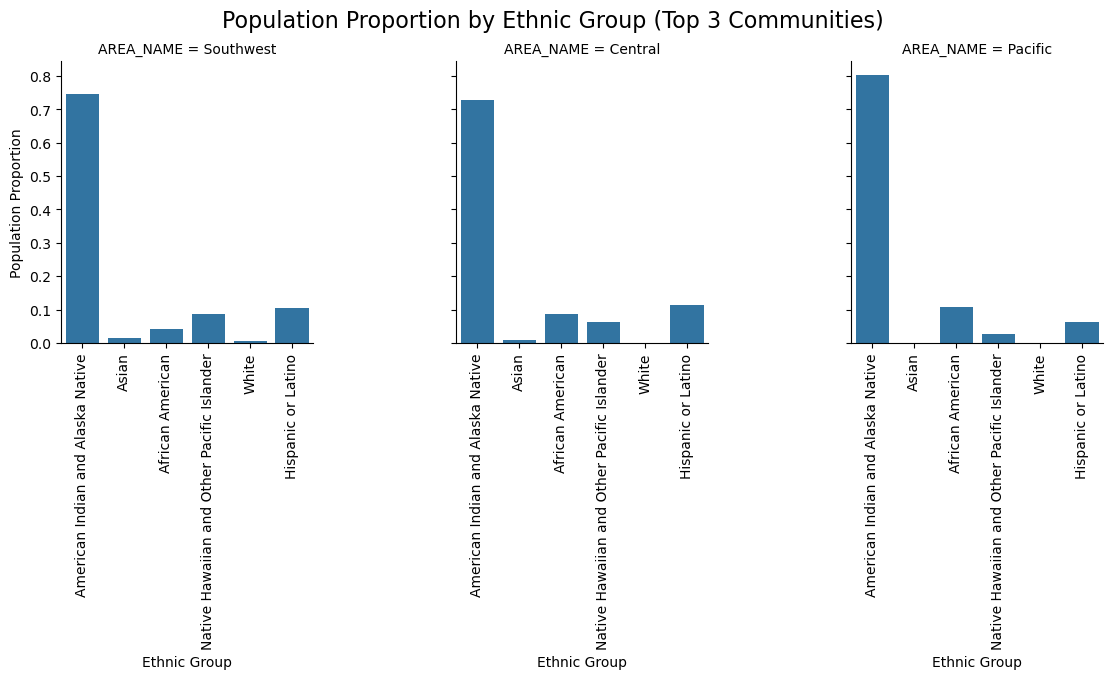

In [85]:
# create a FacetGrid visualization
g = sns.FacetGrid(melted_population, col='AREA_NAME', col_wrap=3, height=4)

# Plot bar charts in each facet, x-axis = Ethnic Group and y-axis = Population Proportion, 
# and order ethnic groups in same order
g.map_dataframe(sns.barplot, x='Ethnic Group', y='Proportion of Population', order=ethnicity_groups)

# Rotate x-axis labels by 90 degrees 
g.set_xticklabels(rotation=90)

# Set axis labels for all plots 
g.set_axis_labels('Ethnic Group', 'Population Proportion')

# Add title above all subplots 
g.fig.suptitle('Population Proportion by Ethnic Group (Top 3 Communities)', size=16)

# Adjust the layout 
plt.subplots_adjust(top=0.85)


# Display the plot
plt.show()

#### Question 2: 
- How have crime rates in neighborhoods changed between January-March 2024 and 2025, considering both statistical significance and trends based on linear regression analysis?

In [86]:
# converts DATE_OCC to datetime format and settx invalid data to missing values
crime_rates['DATE_OCC'] = pd.to_datetime(crime_rates['DATE_OCC'], errors='coerce')

In [87]:
# extract year and month from 'DATE_OCC' (date on which the crime occurred)
crime_rates['Year'] = crime_rates['DATE_OCC'].dt.year
crime_rates['Month'] = crime_rates['DATE_OCC'].dt.month

In [88]:
# filter crime_rates to only include crimes between January-March of 2024 and 2025
crime_rates = crime_rates[crime_rates['Month'].isin([1, 2, 3])]
crime_rates = crime_rates[crime_rates['Year'].isin([2024, 2025])]

In [89]:
# group by year, month, and area name and count the crimes in each group using .size()
monthly_crime = crime_rates.groupby(['Year', 'Month', 'AREA_NAME']).size().reset_index(name='Crime_Count')

In [90]:
# select the crime counts for 2024 and 2025
crime_2024 = monthly_crime[monthly_crime["Year"] == 2024]["Crime_Count"]
crime_2025 = monthly_crime[monthly_crime["Year"] == 2025]["Crime_Count"]

# Perform Welch's t-test
t_stat, p_value = ttest_ind(crime_2024, crime_2025, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05 # set the significance level 
if p_value < alpha: # Check if p-value is less than alpha
    print("Reject H0: The average crime counts are significantly different between January-March 2024 and 2025.")
else:
    print("Fail to reject H0: No significant difference in average crime counts between January-March 2024 and 2025.")

T-Statistic: 31.0895
P-Value: 0.0000
Reject H0: The average crime counts are significantly different between January-March 2024 and 2025.


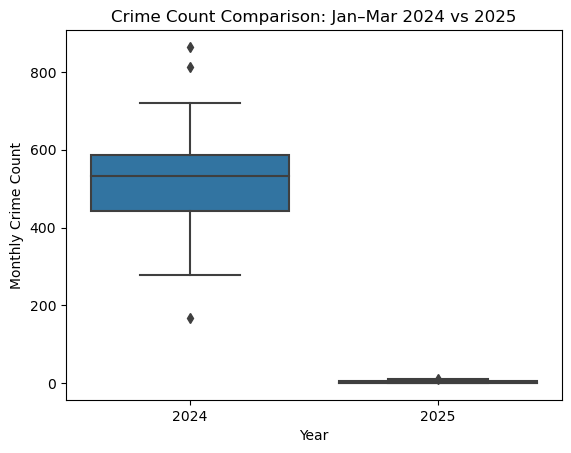

In [91]:
# create a boxplot with the distribution of monthly crime counts
sns.boxplot(x="Year", y="Crime_Count", data=monthly_crime)
plt.title("Crime Count Comparison: Jan–Mar 2024 vs 2025")
plt.ylabel("Monthly Crime Count")
plt.xlabel("Year")
plt.show()

##### Linear Regression

In [92]:
# convert Year to integer
monthly_crime['Year'] = monthly_crime['Year'].astype(int)

In [93]:
# separate X variables = Year and Y variables (target)  
X_crime = monthly_crime[['Year']]  
y_crime = monthly_crime['Crime_Count']  

In [94]:
# fit the linear regression model to predict crime count
model = LinearRegression().fit(X_crime, y_crime)
# Display the intercept and slope
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])  


Intercept: 1045090.3175675673
Slope: -516.0923423423422


In [95]:
# Pearson correlation coefficient between the year and the crime count
correlation = monthly_crime['Year'].corr(monthly_crime['Crime_Count'])
print("Correlation between Year and Crime Count:", correlation)

Correlation between Year and Crime Count: -0.9284977886961753


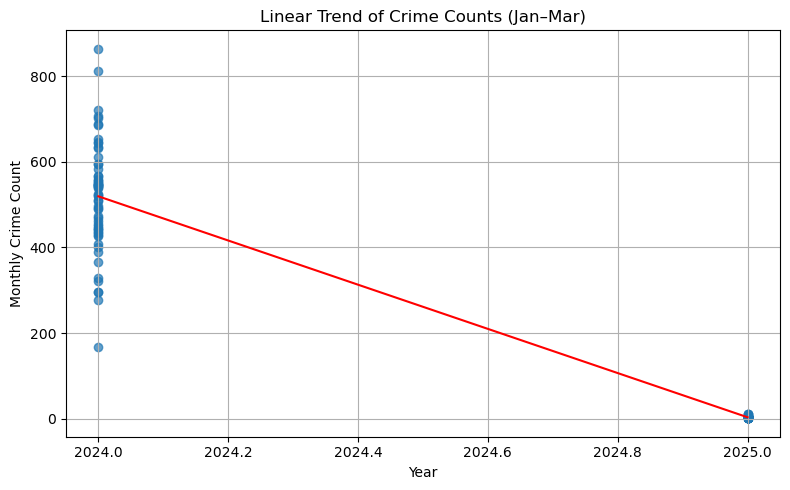

In [96]:
# create a scatter chart
plt.figure(figsize=(8, 5))
plt.scatter(monthly_crime['Year'], monthly_crime['Crime_Count'], alpha=0.7)
# Plot a trend line to display predicted crime counts 
plt.plot(monthly_crime['Year'], model.predict(X_crime), color='red')
plt.title("Linear Trend of Crime Counts (Jan–Mar)")
plt.xlabel("Year")
plt.ylabel("Monthly Crime Count")
# gridlines on the chart
plt.grid(True)
# Adjust plot layout so visualization will fit 
plt.tight_layout()
plt.show()